# Video Presentation

Click on below youtube link for viewing my project presentation.

https://youtu.be/wvt74wxUmr8?si=DycmLcN6Hq8_aWlS

# Project  Detail

Project ID - 123

Team members - 1

Member Name - Anjali Jain

ID - anjali9@illinois.edu

# Note for Reviewer

* Memory limitations required me to run each section separately, so some output may not be visible.
* I added link and its respective screenshots for visibility in case links do not work at reviewer's end.
* Project Proposal is uploaded and graded in gradescope.
* anjali9_finalproject as pdf will be uploaded on gradescope and .ipynb format will be uploaded on github.
* Kindly ignore other files that I uploaded during project draft phase if not required.

# Introduction

**[Convolutional neural network models for cancer type prediction based on gene expression](https://bmcmedgenomics.biomedcentral.com/articles/10.1186/s12920-020-0677-2)**

This paper introduces several convolutional neural network (CNN) models for accurate prediction of cancer types based on gene expression data from The Cancer Genome Atlas (TCGA).

The main contributions of this paper are:

* Proposing three novel CNN architectures (1D-CNN, 2D-Vanilla-CNN, and 2D-Hybrid-CNN) tailored for processing unstructured gene expression data. These models achieve excellent accuracy (up to 95.7%) in classifying 33 cancer types and normal samples simultaneously.

* Incorporating normal tissue samples during training to account for the influence of tissue-of-origin, which helps identify cancer-specific markers rather than just tissue-specific markers.

* Developing a unique interpretation scheme based on guided saliency maps to identify important marker genes for each cancer type predicted by the CNN models.

* Identifying a total of 2090 marker genes across 33 cancer types and normal samples, including well-known cancer markers like GATA3 and ESR1 for breast cancer. The marker genes exhibit differential expression between cancer types.

* Demonstrating the models' applicability by achieving 88.42% accuracy in predicting breast cancer subtypes using the 1D-CNN architecture.

Overall, this paper presents novel CNN models tailored for cancer prediction from gene expression data, accounting for tissue-of-origin effects, and providing an interpretation scheme to identify potential cancer biomarkers, contributing to precision oncology and early cancer detection.


# Scope of reproducibility

The information provided in this paper is giving me some scope of reproducing the results and findings:
* Codes are available for all three models of CNN in GitHub which allows me to refer and reuse to build my 1D-CNN model of 33 type of cancer tissue predictions.
* For each of proposed CNN models (1D-CNN, 2D-Vanilla-CNN, 2D-Hybrid-CNN), there are associated architectural details, including the number of layers, kernel sizes, and hyper parameters used.
* Referring to 34 classes  there is no clear  information available in paper(GitHub) on where to find normal tissue sample  dataset to use for prediction.
* Training deep learning model, especially with large datasets like TCGA, requires significant computational power and time which was one of the big challenge for me.
* Also, there are no exact trained model weights or random seeds used for reproducibility, However, the availability of  code, model architectures along with other details should be  reasonably useful to  reproduce their model training and results.

In last  reproducing the precise numerical results in terms of accuracy for prediction of 33 type cancer model was challenging task for me due to potential differences in computational environments and random initializations .However, I am succuesful with my result.My 1D-CNN model accuracy is close to paper 1D-CNN model accuracy.

# Methodology -

# Environment

I am using Jupyter Notebook as my main interface for developing and customizing code for my project. 
Its flexibility allows me to add text, enhancing readability for both developers and reviewers.

During runtime, system crashes were occurring due to limitations in system RAM and disk space when downloading and preprocessing data. In order to address this issue, I opted to use GPU : Google Colab TPUv2 to alleviate the strain on system resources.

# Python Version

In [27]:
import sys
print(sys.version)

3.9.12 (main, Apr  5 2022, 01:53:17) 
[Clang 12.0.0 ]


# Dependencies/Packages needed 

In [ ]:
!pip install plotly-express

!pip install -U scikit-learn

!pip install progressbar2

# Data

* Data download instruction
* Preprocessing code + command
* Data descriptions with helpful charts and visualizations

Note: For optimal flow of my code, I will be following the new sequence of the above headings.

# Data Download instructions

According to the original paper, the models were trained and tested on gene expression profiles from The Cancer Genome Atlas (TCGA).

I followed below steps to download data:

In the first step, I utilized the dataset available from
https://xenabrowser.net/datapages/?cohort=TCGA%20Pan-Cancer%20(PANCAN)&addHub=https%3A%2F%2Flegacy.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443
under the heading "exon expression RNAseq”.

Two files are downloaded and unzipped below this dataset consists of gene expression (RNA-Seq) data for 10,459 samples across 20,530 features. The samples represent 33 different cancer types, which are the target labels for the classification task.

In [ ]:
!wget "https://pancanatlas.xenahubs.net/download/TCGA_phenotype_denseDataOnlyDownload.tsv.gz"

In [ ]:
!gunzip TCGA_phenotype_denseDataOnlyDownload.tsv.gz

In [ ]:
!wget "https://legacy.xenahubs.net/download/TCGA.PANCAN.sampleMap/HiSeqV2.gz"

In [ ]:
!gunzip 'HiSeqV2.gz'

# Preprocessing code + command

I performed data preprocessing by following below steps:

<B>Step 1 Loading Data:</B>
 
Import necessary libraries such as torch, numpy, pandas, h5py, and scikit-learn modules for data manipulation, feature selection, and saving.


In [ ]:
import pandas as pd
import h5py
import numpy as np
import progressbar

In [ ]:
data = 'HiSeqV2'
labels = 'TCGA_phenotype_denseDataOnlyDownload.tsv'
dbPath = 'data.h5'
verbose = False

print('Loading data ... Patience.')
df = pd.read_csv(data, sep='\t').transpose()

print('Loading labels ...')
labeldf = pd.read_csv(labels, sep = '\t')

In [ ]:
print('Housekeeping ...')
df.columns = df.iloc[0]
df = df.drop('Sample', axis = 0)

labeldf = labeldf.set_index('sample')

In [ ]:
labeldf

In [ ]:
df.columns

In [ ]:
merged_df = df.join(labeldf, how='inner')

In [ ]:
merged_df.info()

In [ ]:
merged_df

In [ ]:
dbPath='data.h5'
nTotal = df.shape[0]    #10459
nFeat = df.shape[1]     #20530

print('Total Number of samples: '+ str(nTotal))
print('Features (RNASeq) per sample: ' + str(nFeat))

print('Diseases to predict: ')

diseases = labeldf._primary_disease.unique()

for disease in diseases:
    print(disease)

# Defining Categorical values for each disease

diseasedict = {
    'skin cutaneous melanoma':0, 'thyroid carcinoma':1, 'sarcoma':2,
    'prostate adenocarcinoma':3, 'pheochromocytoma & paraganglioma':4,
    'pancreatic adenocarcinoma':5, 'head & neck squamous cell carcinoma':6,
    'esophageal carcinoma':7, 'colon adenocarcinoma':8,
    'cervical & endocervical cancer':9, 'breast invasive carcinoma':10,
    'bladder urothelial carcinoma':11, 'testicular germ cell tumor':12,
    'kidney papillary cell carcinoma':13, 'kidney clear cell carcinoma':14,
    'acute myeloid leukemia':15, 'rectum adenocarcinoma':16,
    'ovarian serous cystadenocarcinoma':17, 'lung adenocarcinoma':18,
    'liver hepatocellular carcinoma':19,
    'uterine corpus endometrioid carcinoma':20, 'glioblastoma multiforme':21,
    'brain lower grade glioma':22, 'uterine carcinosarcoma':23, 'thymoma':24,
    'stomach adenocarcinoma':25, 'diffuse large B-cell lymphoma':26,
    'lung squamous cell carcinoma':27, 'mesothelioma':28,
    'kidney chromophobe':29, 'uveal melanoma':30, 'cholangiocarcinoma':31,
    'adrenocortical cancer':32
}

print('Creating Database File at : ' + dbPath)
db = h5py.File(dbPath, mode = 'w')

print('Setting up Database')
db.create_dataset("name", (nTotal,), np.dtype('|S16'))
db.create_dataset("RNASeq", (nTotal, nFeat), np.float32)
db.create_dataset("label", (nTotal,), np.uint8)

idx = 0

print('Writing ' + str(nTotal) + ' samples to Dataset')

for index,row in progressbar.progressbar(df.iterrows(), redirect_stdout=True):
    try:
        data = labeldf.loc[index]
        if(verbose):
            print('Processing '+ str(idx) + ' of ' + str(nTotal) + ' : ' + index + '\t disease: \t' + str(data[2]))
        db["name"][idx] = np.asarray(index, dtype = np.dtype('|S16'))
        db["RNASeq"][idx] = np.asarray(row, dtype = np.float32)
        db["label"][idx] = np.uint8(diseasedict[data[2]])
        idx = idx + 1
    except:
        print("Error: Cannot find label")
        continue

print('Closing Database ..')
db.close()
print('Complete!')

<B> Step 2 Dimensionality reduction using chi2 :</B>

Chi2 effectively captures the association between discrete features (such as gene expression levels or mutation presence/absence) and the cancer type label. Chi2 is a non-parametric test that measures the dependence between categorical variables, making it an ideal choice for analyzing the high-dimensional and discrete nature of genome sequence data.

To enhance computational efficiency, I conducted dimensionality reduction to mitigate the time-consuming nature of the process. I reduced the feature set from its original 20,533 features to 3,000. In the original paper's code, features were reduced to 7,000. Dimensionality reduction alleviates the computational workload by simplifying the dataset while preserving crucial information.

In [ ]:
# load dataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
import pandas as pd
import h5py


diseasedict = {
    'skin cutaneous melanoma':0, 'thyroid carcinoma':1, 'sarcoma':2,
    'prostate adenocarcinoma':3, 'pheochromocytoma & paraganglioma':4,
    'pancreatic adenocarcinoma':5, 'head & neck squamous cell carcinoma':6,
    'esophageal carcinoma':7, 'colon adenocarcinoma':8,
    'cervical & endocervical cancer':9, 'breast invasive carcinoma':10,
    'bladder urothelial carcinoma':11, 'testicular germ cell tumor':12,
    'kidney papillary cell carcinoma':13, 'kidney clear cell carcinoma':14,
    'acute myeloid leukemia':15, 'rectum adenocarcinoma':16,
    'ovarian serous cystadenocarcinoma':17, 'lung adenocarcinoma':18,
    'liver hepatocellular carcinoma':19,
    'uterine corpus endometrioid carcinoma':20, 'glioblastoma multiforme':21,
    'brain lower grade glioma':22, 'uterine carcinosarcoma':23, 'thymoma':24,
    'stomach adenocarcinoma':25, 'diffuse large B-cell lymphoma':26,
    'lung squamous cell carcinoma':27, 'mesothelioma':28,
    'kidney chromophobe':29, 'uveal melanoma':30, 'cholangiocarcinoma':31,
    'adrenocortical cancer':32
}

dbPath = 'data.h5'
db = h5py.File(dbPath, mode = 'r')
X = db["RNASeq"][...]
y = db["label"][...]

In [2]:
X.shape, y.shape

((10459, 3000), (10459,))

In [19]:
from joblib import Parallel
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2

num_features_to_select = 3000

# Select features
selector = SelectKBest(chi2, k=num_features_to_select)
X_filtered = selector.fit_transform(X, y)

In [ ]:
https://colab.research.google.com/drive/1WYQGyIANp3qeO4Pf-6fol2wnfDFEZ5p1?authuser=1#scrollTo=-qwlYo_2Pafq

<B> Step 3 Save Preprocessed Data : </B>

In the final step, save the preprocessed data, including the reduced dimensionality and labels, into a new HDF5 file. HDF5 is chosen for its convenience and efficiency in storing and accessing large datasets.

In [27]:
import h5py

# Open the HDF5 file in write mode
db = h5py.File('data_chi2.h5', mode='w')

db.create_dataset("RNASeq", (y.shape[0], num_features_to_select), np.float32, data = X_filtered)
db.create_dataset("label", (y.shape[0],), np.uint8, data = y)

# Close the HDF5 file
db.close()

#### Load new dataset

In [31]:
import h5py

dbPath = 'data_chi2.h5'
db = h5py.File(dbPath, mode = 'r')
X = db["RNASeq"][...]
y = db["label"][...]


diseasedict = {
    'skin cutaneous melanoma':0, 'thyroid carcinoma':1, 'sarcoma':2,
    'prostate adenocarcinoma':3, 'pheochromocytoma & paraganglioma':4,
    'pancreatic adenocarcinoma':5, 'head & neck squamous cell carcinoma':6,
    'esophageal carcinoma':7, 'colon adenocarcinoma':8,
    'cervical & endocervical cancer':9, 'breast invasive carcinoma':10,
    'bladder urothelial carcinoma':11, 'testicular germ cell tumor':12,
    'kidney papillary cell carcinoma':13, 'kidney clear cell carcinoma':14,
    'acute myeloid leukemia':15, 'rectum adenocarcinoma':16,
    'ovarian serous cystadenocarcinoma':17, 'lung adenocarcinoma':18,
    'liver hepatocellular carcinoma':19,
    'uterine corpus endometrioid carcinoma':20, 'glioblastoma multiforme':21,
    'brain lower grade glioma':22, 'uterine carcinosarcoma':23, 'thymoma':24,
    'stomach adenocarcinoma':25, 'diffuse large B-cell lymphoma':26,
    'lung squamous cell carcinoma':27, 'mesothelioma':28,
    'kidney chromophobe':29, 'uveal melanoma':30, 'cholangiocarcinoma':31,
    'adrenocortical cancer':32
}


X_filtered = X

In [32]:
X_filtered.shape, y.shape

((10459, 3000), (10459,))

In [33]:
df = pd.DataFrame(X_filtered)
df

0       1        2       3       4        5        6        7     \
0      0.4657  0.4657  10.6975  7.1610  8.6908  10.8521  10.7787  10.4827   
1      0.0000  1.4714   3.7454  3.3023  0.9157   0.0000   0.9157   1.8717   
2      0.4192  0.0000   3.1301  1.8866  0.0000   3.0145   0.0000   1.0083   
3      1.5378  2.0609   3.5591  5.6213  0.0000   6.1195   0.7088   5.0872   
4      0.0000  0.0000  10.3031  7.0199  6.4548   9.7056   9.0956  10.0102   
...       ...     ...      ...     ...     ...      ...      ...      ...   
10454  0.0000  0.6881   4.0250  2.9492  0.0000   4.7698   0.0000   3.0052   
10455  0.0000  0.9655   3.9345  1.8240  0.3979   2.6777   0.3979   3.9933   
10456  0.4791  0.4791   4.4512  6.2817  0.4791   2.3041   0.8381   3.9240   
10457  0.0000  0.0000   3.9901  1.3603  0.8349   0.8349   0.0000   2.2982   
10458  0.0000  0.0000   3.0369  1.8886  1.4864   0.0000   0.0000   0.9267   

          8       9     ...    2990    2991     2992    2993    2994    2995  \
0      10.4528  8.3704  ...  2.0172  0.0000   0.4657  6.4852  0.4657  0.0000   
1       2.1846  0.0000  ...  9.6999  0.9157   3.3023  0.0000  0.0000  0.0000   
2       7.3533  0.4192  ...  0.4192  6.9975   7.2096  0.0000  0.0000  1.0083   
3       2.8768  5.1911  ...  0.0000  1.1821   7.0688  2.4724  5.9223  0.0000   
4       7.3069  7.7443  ...  1.6216  1.0276   0.0000  5.1006  2.3657  0.0000   
...        ...     ...  ...     ...     ...      ...     ...     ...     ...   
10454   2.4001  0.6881  ...  0.3847  3.5097   5.7349  0.6881  2.1248  0.0000   
10455   3.2105  1.5387  ...  0.3979  2.2662   0.0000  1.8240  1.6884  0.0000   
10456   3.8071  0.8381  ...  0.0000  0.4791  10.1678  1.7122  7.7071  0.0000   
10457   0.8349  0.0000  ...  7.0686  0.0000   0.8349  0.0000  0.8349  0.0000   
10458   2.2028  0.0000  ...  9.9370  0.0000   0.0000  0.0000  1.4864  0.0000   

         2996    2997    2998    2999  
0      0.8172  0.4657  9.4725  1.3357  
1      0.0000  7.0754  1.4714  3.5408  
2      1.0083  9.8931  0.0000  0.0000  
3      5.4007  5.5051  3.6347  2.0609  
4      1.0276  2.2125  8.8602  0.0000  
...       ...     ...     ...     ...  
10454  3.6214  8.6972  0.0000  0.9387  
10455  2.0620  8.1511  0.0000  0.3979  
10456  6.7723  6.3599  1.5701  2.5176  
10457  0.0000  8.2344  0.0000  2.8619  
10458  0.0000  6.8730  1.4864  3.1872  

[10459 rows x 3000 columns]

In [34]:
X_filtered

array([[ 0.4657,  0.4657, 10.6975, ...,  0.4657,  9.4725,  1.3357],
       [ 0.    ,  1.4714,  3.7454, ...,  7.0754,  1.4714,  3.5408],
       [ 0.4192,  0.    ,  3.1301, ...,  9.8931,  0.    ,  0.    ],
       ...,
       [ 0.4791,  0.4791,  4.4512, ...,  6.3599,  1.5701,  2.5176],
       [ 0.    ,  0.    ,  3.9901, ...,  8.2344,  0.    ,  2.8619],
       [ 0.    ,  0.    ,  3.0369, ...,  6.873 ,  1.4864,  3.1872]],
      dtype=float32)

In [35]:
y

array([22, 19,  9, ..., 18, 19, 19], dtype=uint8)

# Data descriptions with helpful charts and visualizations

For my 1D-CNN prediction model of 33 cancer types, I am working with a large dataset of RNA sequencing data and associated clinical information. Here are the key data descriptions:

Dataset: The dataset is loaded from a file named 'HiSeqV2' and contains gene expression data for 10,459 samples. The data is initially loaded in chunks of 21,000 rows to conserve memory.

Columns: The dataset has 20,530 columns, where each column represents a different gene or feature. The column names are set to the first row of the dataset.

Samples: The rows in the dataset represent the different samples, with each row containing the gene expression values for that sample.

Labels: The clinical information for the samples is loaded from a separate file named 'TCGA_phenotype_denseDataOnlyDownload.tsv'. This file contains the sample ID, sample type (e.g., Additional Metastatic, Metastatic), and primary disease for each sample.

Data Representation: The gene expression data is represented as a numerical matrix, where each row corresponds to a sample and each column corresponds to a gene. The values in the matrix represent the expression level of each gene in each sample.

Diseases: The dataset includes samples from a variety of cancer types, including skin cutaneous melanoma, thyroid carcinoma, sarcoma, prostate adenocarcinoma, and many others. The unique disease types are identified and listed in the output.

Disease Encoding: A dictionary 'diseasedict' is created to map the disease types to numeric values, which can be useful for downstream machine learning tasks. 

Data Dimensions: The total number of samples in the dataset is 10,459, and the number of features (genes) per sample is 20,530 which is reduced to 3000 features for computation efficiency of my project.

For my this project I setup a large-scale RNA sequencing dataset for analysis and build, with a focus on exploring the gene expression patterns across different cancer types.

Below are the visual representations

## Plot 1 - Visualizing gene sequences associated with different types of cancer.

In [36]:
import numpy as np
from sklearn.manifold import TSNE
import plotly_express as px
import pandas as pd

X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', perplexity=3).fit_transform(X_filtered)
X_embedded.shape

diseasedict = {
    'skin cutaneous melanoma':0, 'thyroid carcinoma':1, 'sarcoma':2,
    'prostate adenocarcinoma':3, 'pheochromocytoma & paraganglioma':4,
    'pancreatic adenocarcinoma':5, 'head & neck squamous cell carcinoma':6,
    'esophageal carcinoma':7, 'colon adenocarcinoma':8,
    'cervical & endocervical cancer':9, 'breast invasive carcinoma':10,
    'bladder urothelial carcinoma':11, 'testicular germ cell tumor':12,
    'kidney papillary cell carcinoma':13, 'kidney clear cell carcinoma':14,
    'acute myeloid leukemia':15, 'rectum adenocarcinoma':16,
    'ovarian serous cystadenocarcinoma':17, 'lung adenocarcinoma':18,
    'liver hepatocellular carcinoma':19,
    'uterine corpus endometrioid carcinoma':20, 'glioblastoma multiforme':21,
    'brain lower grade glioma':22, 'uterine carcinosarcoma':23, 'thymoma':24,
    'stomach adenocarcinoma':25, 'diffuse large B-cell lymphoma':26,
    'lung squamous cell carcinoma':27, 'mesothelioma':28,
    'kidney chromophobe':29, 'uveal melanoma':30, 'cholangiocarcinoma':31,
    'adrenocortical cancer':32
}

keyslist = list(diseasedict.keys())
valueslist = list(diseasedict.values())

cancers = []

for classno in y:
    cancers.append(keyslist[valueslist.index(classno)])

tsne = pd.DataFrame(X_embedded, columns = ["tsne1", "tsne2"])
cancers = pd.DataFrame(cancers, columns = ["cancer"])
tsne = pd.concat([tsne,cancers], axis = 1, sort = False)
tsne = tsne.sort_values(by = "cancer")

In [37]:
figx = px.scatter(
    tsne,
    x="tsne1",
    y="tsne2",
    color="cancer",
    hover_name="cancer",
    width=970,
    height=500,
    template="ggplot2",
    color_discrete_sequence= px.colors.qualitative.Alphabet,
    #facet_col="group_label",
    size_max=0.1,
)

figx.show()

## Plot 2 - Cancer type Value counts.

In [38]:

diseasedict = {
    'skin cutaneous melanoma':0, 'thyroid carcinoma':1, 'sarcoma':2,
    'prostate adenocarcinoma':3, 'pheochromocytoma & paraganglioma':4,
    'pancreatic adenocarcinoma':5, 'head & neck squamous cell carcinoma':6,
    'esophageal carcinoma':7, 'colon adenocarcinoma':8,
    'cervical & endocervical cancer':9, 'breast invasive carcinoma':10,
    'bladder urothelial carcinoma':11, 'testicular germ cell tumor':12,
    'kidney papillary cell carcinoma':13, 'kidney clear cell carcinoma':14,
    'acute myeloid leukemia':15, 'rectum adenocarcinoma':16,
    'ovarian serous cystadenocarcinoma':17, 'lung adenocarcinoma':18,
    'liver hepatocellular carcinoma':19,
    'uterine corpus endometrioid carcinoma':20, 'glioblastoma multiforme':21,
    'brain lower grade glioma':22, 'uterine carcinosarcoma':23, 'thymoma':24,
    'stomach adenocarcinoma':25, 'diffuse large B-cell lymphoma':26,
    'lung squamous cell carcinoma':27, 'mesothelioma':28,
    'kidney chromophobe':29, 'uveal melanoma':30, 'cholangiocarcinoma':31,
    'adrenocortical cancer':32
}

In [39]:
import plotly.express as px

# Reverse the diseasedict
diseasedict_reversed = {v: k for k, v in diseasedict.items()}

# Map the y array to the disease labels using the reversed diseasedict
y_labels = pd.Series(y).map(diseasedict_reversed)

# Create a bar chart
fig = px.bar(x=y_labels.value_counts().index, y=y_labels.value_counts().values, 
             title='Value Counts of Cancer Types', 
             labels={'x': 'Cancer Type', 'y': 'Count'})

# Show the plot
fig.show()

## Plot 3 - Heatmap of gene expression.
Use a heatmap to visualize the expression levels of genes across different samples.

<AxesSubplot:>

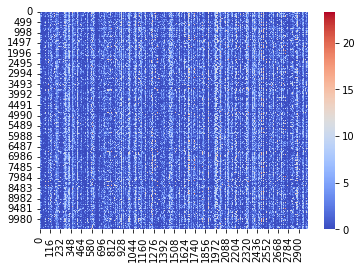

In [40]:
import seaborn as sns
sns.heatmap(X_filtered, cmap='coolwarm')

## Plot 4 - Correlation Correlation matrix.
Calculate the correlation between different genes and visualize it as a heatmap.


<AxesSubplot:>

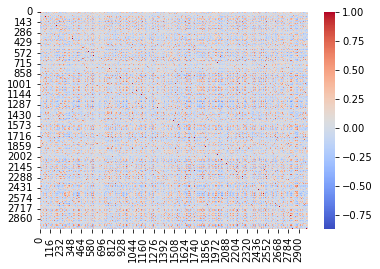

In [41]:
import seaborn as sns
corr_matrix = np.corrcoef(X_filtered.T)
sns.heatmap(corr_matrix, cmap='coolwarm')

## Plot 5 -  Heatmap of sample clustering.
Use clustering algorithms (e.g., k-means) to group similar samples and visualize them as a heatmap.

<AxesSubplot:>

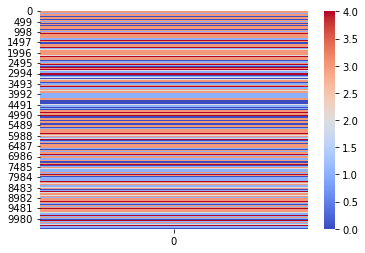

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
sample_clusters = kmeans.fit_predict(X_filtered)
sns.heatmap(sample_clusters.reshape(-1, 1), cmap='coolwarm')

# Model

<B>Citation to the original paper</B>

PAPER: Convolutional neural network models for cancer type prediction based on gene expression.

BY: BMC Medical Genomics, 13(Suppl 5).
Milad Mostavi, Yu-Chiao Chiu,Yufei Huang, & Yidong Chen .

Article No. : 44

YEAR: 2020

<B>Link to the paper is</B>

https://bmcmedgenomics.biomedcentral.com/articles/10.1186/s12920-020-0677-2

<B>Link to the original paper’s repo is</B>

https://github.com/chenlabgccri/CancerTypePrediction

### Model Description

For my project I am working with 1-dimensional Convolutional Neural Network (CNN) model using PyTorch. Here's a breakdown of its structure and functionality:

<B>Model Class:</B>

CNN(nn.Module): The model inherits from nn.Module, the base class for all neural network modules in PyTorch.

<B>Initialization (__init__):</B>

input_channels: This parameter defines the number of input features (determined by X_filtered.shape[1]).

num_classes: This parameter defines the number of output classes, which is the number of unique labels in the target variable (y).

<B>Layers:</B>

conv1:A 1D convolutional layer with:

Input channels: 1 (assuming single-channel data after unsqueeze)

Output channels: 32 (number of filters)

Kernel size: 3

Padding: 1 (to maintain input size after convolution)

pool: A 1D max pooling layer with a kernel size of 2, which downsamples the input by taking the maximum value over non-overlapping windows of size 2.

fc1: A fully connected (linear) layer with:

Input features: 32 * (input_channels // 2) (calculated based on the output size of the convolutional and pooling layers)

Output features: 128

fc2: A fully connected layer with:

Input features: 128

Output features: num_classes (number of classes to predict)

<B>Forward Pass (forward):</B>

x.unsqueeze(1): Adds a channel dimension to the input data x to make it compatible with the 1D convolutional layer.

Convolution and Activation: The input goes through the conv1 layer followed by a ReLU activation function (nn.functional.relu).

Pooling: The output is then passed through the pool layer to downsample the feature maps.

Flattening: torch.flatten(x, 1) flattens the output of the pooling layer into a 1D vector to be fed into the fully connected layers.

Fully Connected Layers and Output: The flattened features go through fc1 with ReLU activation and then fc2 to produce the final output logits (unnormalized predictions for each class).

<B>Data Preparation:</B>

Input Channels and Classes: The number of input channels and classes are determined from the preprocessed data (X_filtered and y).

Train-Test Split: The data is split into training and testing sets using train_test_split with a test size of 20% and a random state of 42 for reproducibility.

Tensor Conversion: The NumPy arrays are converted to PyTorch tensors with appropriate data types (float for features and long for labels).

Below 1D-CNN model is designed to take 1D sequence data as input (e.g., gene expression values), process it through convolutional and pooling layers to extract features, and then use fully connected layers to classify the data into one of the predefined classes.

<B>Implementation code</B>

Refer Below code section.

<B>Pretrained model (if applicable)</B> 

Pretrained model is not applicable.

# Define 1D-CNN Model

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# import torch.nn.functional as F
import numpy as np

# Define the CNN model
class CNN(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)  # Adjust conv1d layer
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(32 * (input_channels // 2), 128)  # Adjust fc1 layer
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add a channel dimension
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Data preparation

In [44]:
input_channels = X_filtered.shape[1]
num_classes = len(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).long()

# Training

<B>Hyperparams</B>

To achieve optimal model performance, it's essential to select the right hyperparameter values. These values typically demand experimentation and tuning tailored to the dataset and task. Below, three crucial hyperparameters are defined:


In [45]:
# Define hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 20

<B>Computational requirements</B>

All 3 computational requirements for training the 1D CNN model can be summarized as follows:

The dataset has 10,459 samples (rows) and 3000 features (columns).
This is a large dataset that may require significant memory and computational resources, especially during the training process.

Hardware

Memory Requirements

The code loads the entire dataset into memory, which required a large amount of RAM, especially for the 3000 features.

To mitigate this, the code loads the data in chunks of rows, which can help reduce the memory footprint during training.

During runtime, system crashes were occurring due to limitations in system RAM and disk space when downloading and preprocessing data. In order to address this issue, I opted to use GPU : Google Colab TPUv2 to alleviate the strain on system resources.

Below are the snapshot for detail can check the link given below under "Wandb for monitoring loss Curves"

View run mythical-master-6 at: https://wandb.ai/anjali-ai/cancer-prediction-demo/runs/g04jphmu under system section there are charts give clear view 
 
Incase link not open please find snap shot:
 
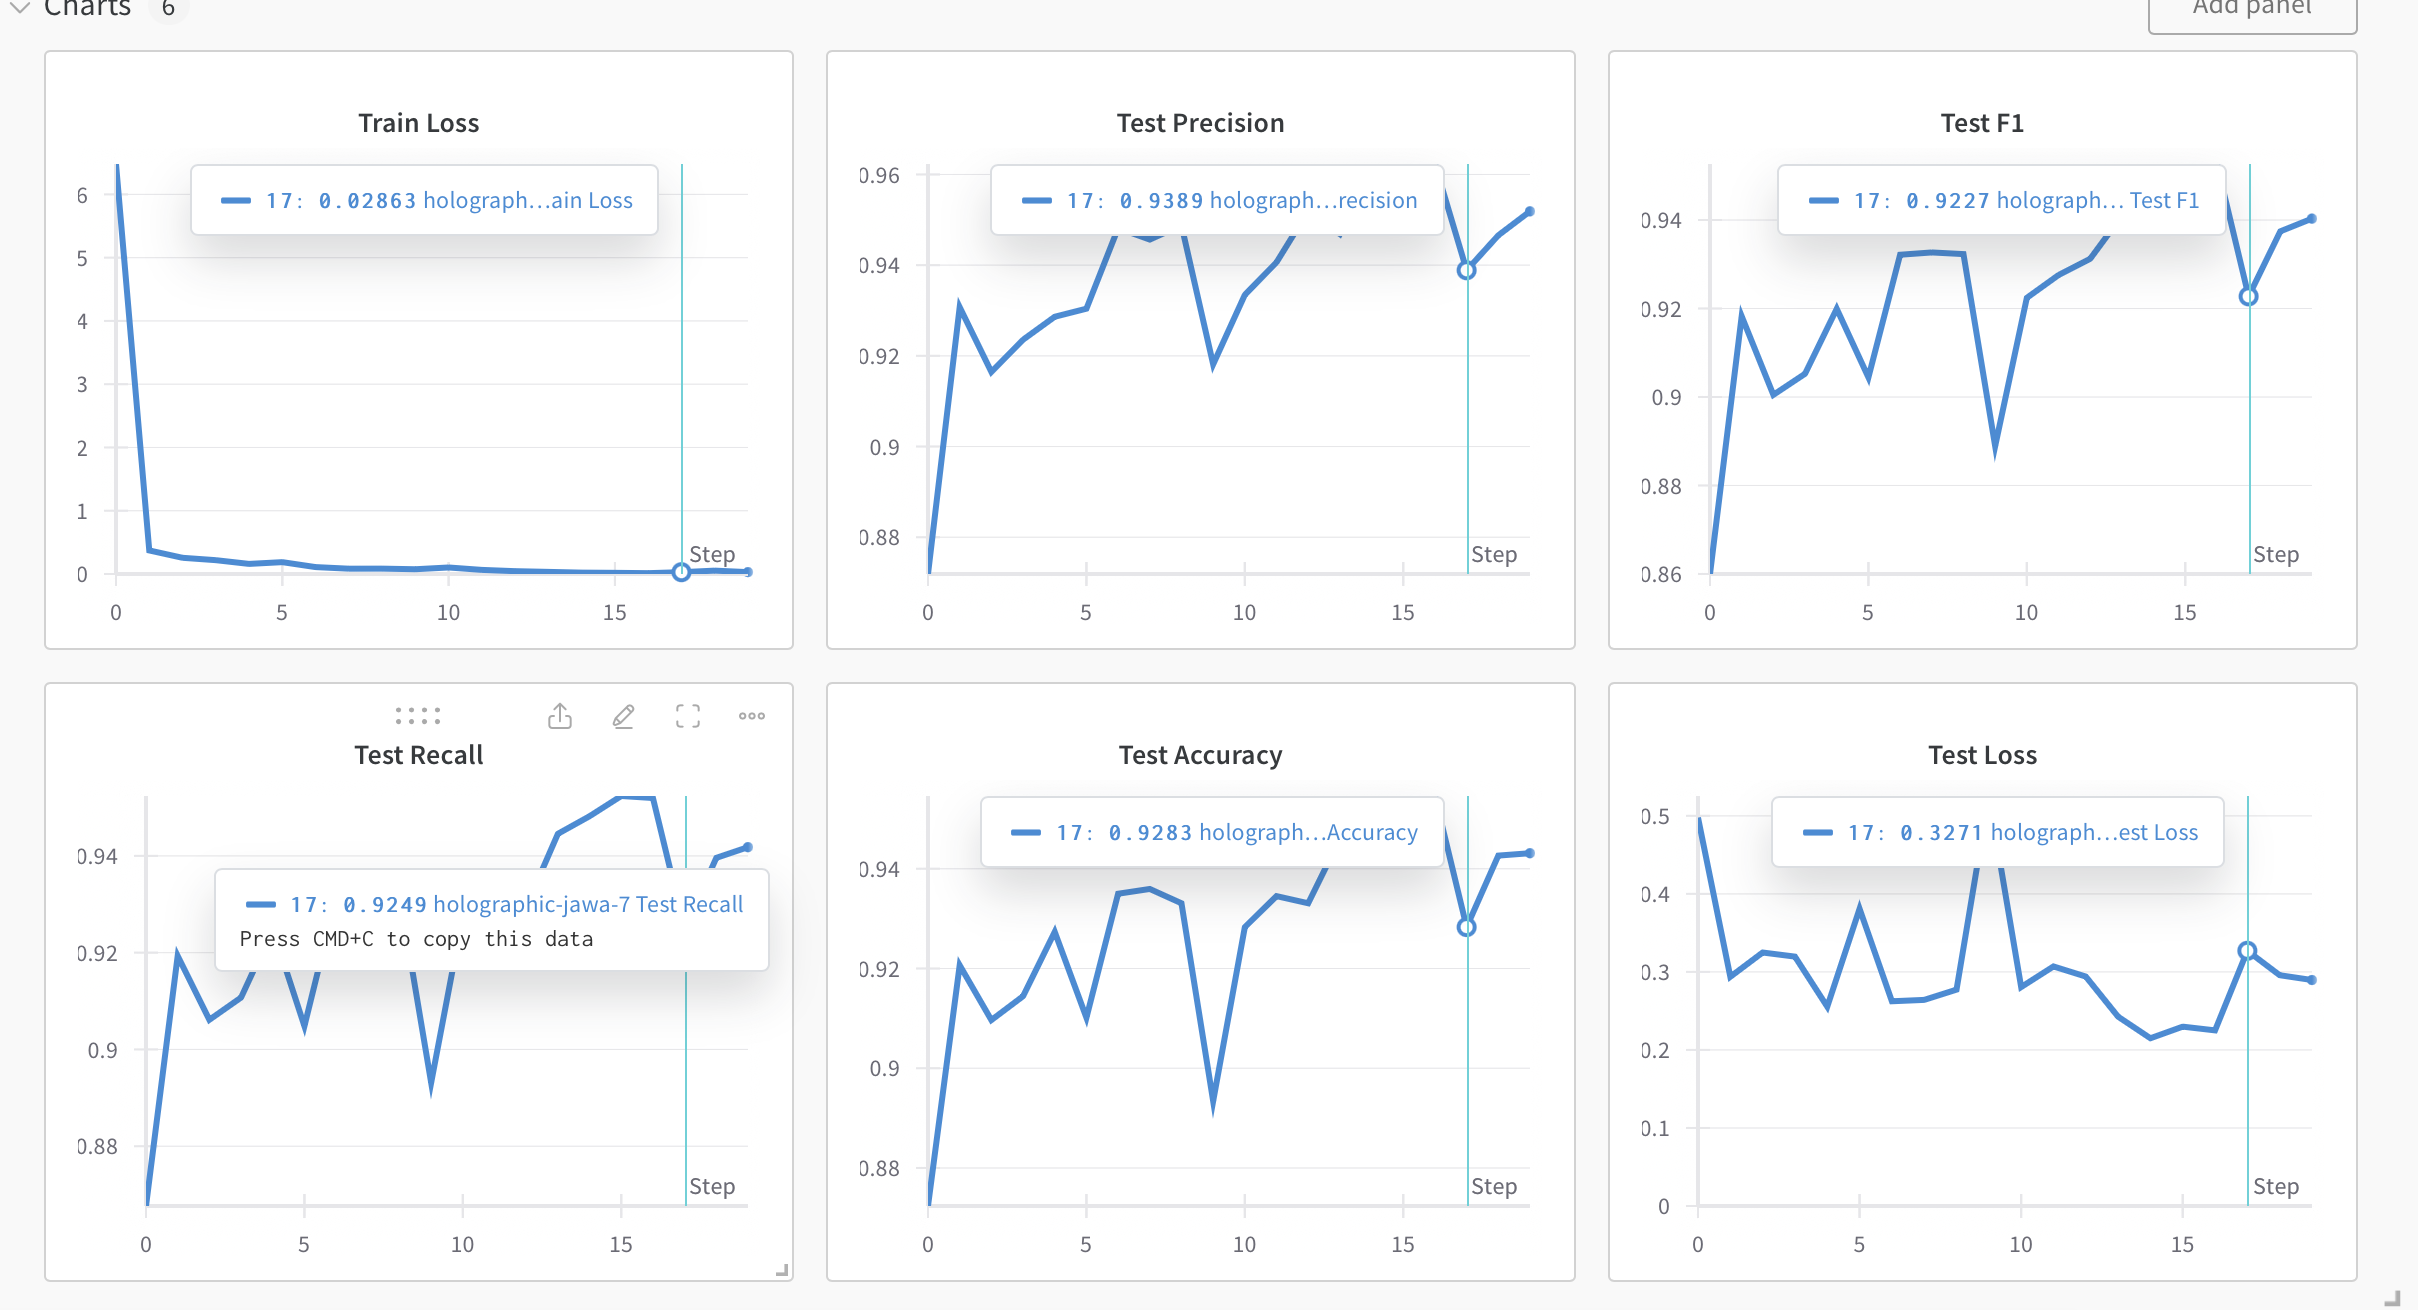


average runtime for each epoch

Number of epochs = 20

Time = 10 minutes

Average runtime to run each epochs is 30 seconds or 1/2 minute. 


### Wandb for monitoring loss curves

In [47]:
import wandb

# Initialize W&B
wandb.init(settings=wandb.Settings(start_method="fork"), project="cancer-prediction-demo", config={
    "learning_rate": 0.001,
    "architecture": "CNN",
    "dataset": "TCGA",
    "epochs": num_epochs,
    "batch_size": batch_size
    })


# Initialize the model, loss function, and optimizer
model = CNN(input_channels, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Training Code : Refer below code section.

# Training & Evaluation

Metrics Description

Analyzing metrics based on codes provides valuable insights into the model's learning progress and its ability to generalize to unseen data. It has also assisted me in making informed decisions regarding hyperparameter tuning and model selection.

Below code includes calculations and outputs related to the following primary metrics used for evaluating the performance of the model during training:

* Loss:

train_loss: This metric measures the average loss over all training batches in a single epoch. Loss typically represents the error between the model's predictions and the actual target labels. A lower training loss indicates better performance on the training data.

test_loss: This metric measures the average loss over all test batches. It reflects how well the model generalizes to unseen data. A lower test loss suggests better generalization ability.

* Accuracy:

test_accuracy: This metric represents the percentage of correct predictions made by the model on the test dataset. It's calculated by comparing the predicted class labels with the true labels and dividing the number of correct predictions by the total number of test samples. Higher test accuracy indicates better overall performance on the test set.

* Precision:

Test Precision: Represents the weighted average precision value for the test dataset, calculated using the precision_score function from the sklearn.metrics library. Higher test precision indicates better performance in identifying true positives.

* Recall:

Test Recall: Represents the weighted average recall value for the test dataset, calculated using the recall_score function from the sklearn.metrics library. Higher test recall indicates better performance in detecting all true positives.

* F1 Score:

Test F1: Represents the weighted average F1 score value for the test dataset, calculated using the f1_score function from the sklearn.metrics library. The F1 score is the harmonic mean of precision and recall, providing a balanced measure of both. Higher test F1 indicates better overall performance on the test set.

* Pattern of Epochs

The model's performance on the test set shows a pattern of improvement until the 5th epoch, where the test accuracy reaches its highest value (0.9460). After the 5th epoch, the model starts to overfit the training data, resulting in a decrease in test accuracy and an increase in test loss. This suggests that the model has started to memorize the training data and is losing its ability to generalize to new data.

For detail refer below code output.

Observations from the Output:

* Training Loss: 

The training loss generally decreases across epochs, suggesting that the model is learning from the training data.

* Test Loss: 

The test loss initially decreases but fluctuate after 5 th epochs, indicating potential overfitting, where the model starts to memorize the training data and loses its ability to generalize to new data.

* Test Accuracy: 

Increases until the 14th epoch and then decreases, indicating overfitting. The highest achieved test accuracy is around 94.6%, which indicates good performance on the test set.

* Test Precision, Test Recall, and Test F1: 

Show similar trends, indicating the model's performance in terms of precision, recall, and F1 score.

Evaluation Code:Refer below code section and outcome.

### Training loop with test evaluation code for each epoch¶

In [48]:
# Training and evaluation loop
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
step_value = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    # Increment step value
    
    wandb.log({"Train Loss": train_loss}, step=step_value)
    
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}")

    # Evaluation on test set
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    test_precision = 0.0
    test_recall = 0.0
    test_f1 = 0.0
#     test_roc_auc = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            test_accuracy += (predicted == labels).sum().item()
            
            # Calculate precision, recall, F1 score
            precision = precision_score(labels.cpu(), predicted.cpu(), average='weighted', zero_division=0)
            recall = recall_score(labels.cpu(), predicted.cpu(), average='weighted', zero_division=0)
            f1 = f1_score(labels.cpu(), predicted.cpu(), average='weighted')
            test_precision += precision
            test_recall += recall
            test_f1 += f1
            
            # Calculate ROC AUC
#             roc_auc = roc_auc_score(labels.cpu(), outputs.cpu()[:, 1])
#             test_roc_auc += roc_auc
    
    test_loss /= len(test_loader)
    test_accuracy /= len(test_dataset)
    test_precision /= len(test_loader)
    test_recall /= len(test_loader)
    test_f1 /= len(test_loader)
#     test_roc_auc /= len(test_loader)

    wandb.log({"Test Loss": test_loss, 
               "Test Accuracy": test_accuracy, 
               "Test Precision": test_precision, 
               "Test Recall": test_recall, 
               "Test F1": test_f1}, step=step_value)
    step_value += 1

    print(f"Epoch {epoch + 1}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")

Epoch 1, Train Loss: 6.4801
Epoch 1, Test Loss: 0.4977, Test Accuracy: 0.8724, Test Precision: 0.8719, Test Recall: 0.8676, Test F1: 0.8600
Epoch 2, Train Loss: 0.3723
Epoch 2, Test Loss: 0.2937, Test Accuracy: 0.9207, Test Precision: 0.9307, Test Recall: 0.9193, Test F1: 0.9182
Epoch 3, Train Loss: 0.2560
Epoch 3, Test Loss: 0.3248, Test Accuracy: 0.9097, Test Precision: 0.9165, Test Recall: 0.9061, Test F1: 0.9005
Epoch 4, Train Loss: 0.2187
Epoch 4, Test Loss: 0.3196, Test Accuracy: 0.9144, Test Precision: 0.9236, Test Recall: 0.9107, Test F1: 0.9052
Epoch 5, Train Loss: 0.1596
Epoch 5, Test Loss: 0.2555, Test Accuracy: 0.9273, Test Precision: 0.9286, Test Recall: 0.9249, Test F1: 0.9199
Epoch 6, Train Loss: 0.1873
Epoch 6, Test Loss: 0.3809, Test Accuracy: 0.9101, Test Precision: 0.9304, Test Recall: 0.9048, Test F1: 0.9044
Epoch 7, Train Loss: 0.1092
Epoch 7, Test Loss: 0.2624, Test Accuracy: 0.9350, Test Precision: 0.9481, Test Recall: 0.9314, Test F1: 0.9321
Epoch 8, Train Loss:

In [49]:
# Close the W&B run
wandb.finish()

### Cross Validation Train and Test

In [50]:
# Initialize W&B
wandb.init(settings=wandb.Settings(start_method="fork"), project="cancer-prediction", config={
    "learning_rate": 0.001,
    "architecture": "CNN",
    "dataset": "TCGA",
    "epochs": num_epochs,
    "batch_size": batch_size
    })


# Initialize the model, loss function, and optimizer
model = CNN(input_channels, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [51]:
# Define stratified k-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store fold-wise test losses and accuracies
fold_test_losses = []
fold_test_accuracies = []

# Training and evaluation loop
for fold, (train_index, test_index) in enumerate(kf.split(X_train_tensor, y_train_tensor)):
    X_fold_train, X_fold_test = X_train_tensor[train_index], X_train_tensor[test_index]
    y_fold_train, y_fold_test = y_train_tensor[train_index], y_train_tensor[test_index]

    # Create a new data loader for each fold
    fold_train_dataset = TensorDataset(X_fold_train, y_fold_train)
    fold_test_dataset = TensorDataset(X_fold_test, y_fold_test)
    fold_train_loader = DataLoader(fold_train_dataset, batch_size=batch_size, shuffle=True)
    fold_test_loader = DataLoader(fold_test_dataset, batch_size=batch_size, shuffle=False)

    # Train the model
    model.train()
    running_loss = 0.0
    for inputs, labels in fold_train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    fold_train_loss = running_loss / len(fold_train_loader)
    wandb.log({"Fold Train Loss": fold_train_loss}, step=fold)
    print(f"Fold {fold + 1}, Train Loss: {fold_train_loss:.4f}")

    # Evaluation
    model.eval()
    fold_test_loss = 0.0
    fold_test_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in fold_test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            fold_test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            fold_test_accuracy += (predicted == labels).sum().item()
    
    fold_test_loss /= len(fold_test_loader)
    fold_test_losses.append(fold_test_loss)
    fold_test_accuracy /= len(fold_test_dataset)
    fold_test_accuracies.append(fold_test_accuracy)
    wandb.log({"Fold Test Loss": fold_test_loss, "Fold Test Accuracy": fold_test_accuracy}, step=fold)
    print(f"Fold {fold + 1}, Test Loss: {fold_test_loss:.4f}, Test Accuracy: {fold_test_accuracy:.4f}")

# Calculate and print average test loss and accuracy across folds
avg_test_loss = sum(fold_test_losses) / len(fold_test_losses)
avg_test_accuracy = sum(fold_test_accuracies) / len(fold_test_accuracies)
print(f"Average Test Loss: {avg_test_loss:.4f}, Average Test Accuracy: {avg_test_accuracy:.4f}")

# Log average test loss and accuracy to W&B
wandb.log({"Average Test Loss": avg_test_loss, "Average Test Accuracy": avg_test_accuracy})

# Close the W&B run
wandb.finish()

Fold 1, Train Loss: 10.5263
Fold 1, Test Loss: 0.7433, Test Accuracy: 0.7945
Fold 2, Train Loss: 0.5203
Fold 2, Test Loss: 0.3789, Test Accuracy: 0.9098
Fold 3, Train Loss: 0.3070
Fold 3, Test Loss: 0.2753, Test Accuracy: 0.9127
Fold 4, Train Loss: 0.2216
Fold 4, Test Loss: 0.2282, Test Accuracy: 0.9307
Fold 5, Train Loss: 0.2252
Fold 5, Test Loss: 0.1489, Test Accuracy: 0.9432
Average Test Loss: 0.3549, Average Test Accuracy: 0.8982


# Results

Table of results for above experiments:

Below tables are the summary of above experiments along with its discussion points.

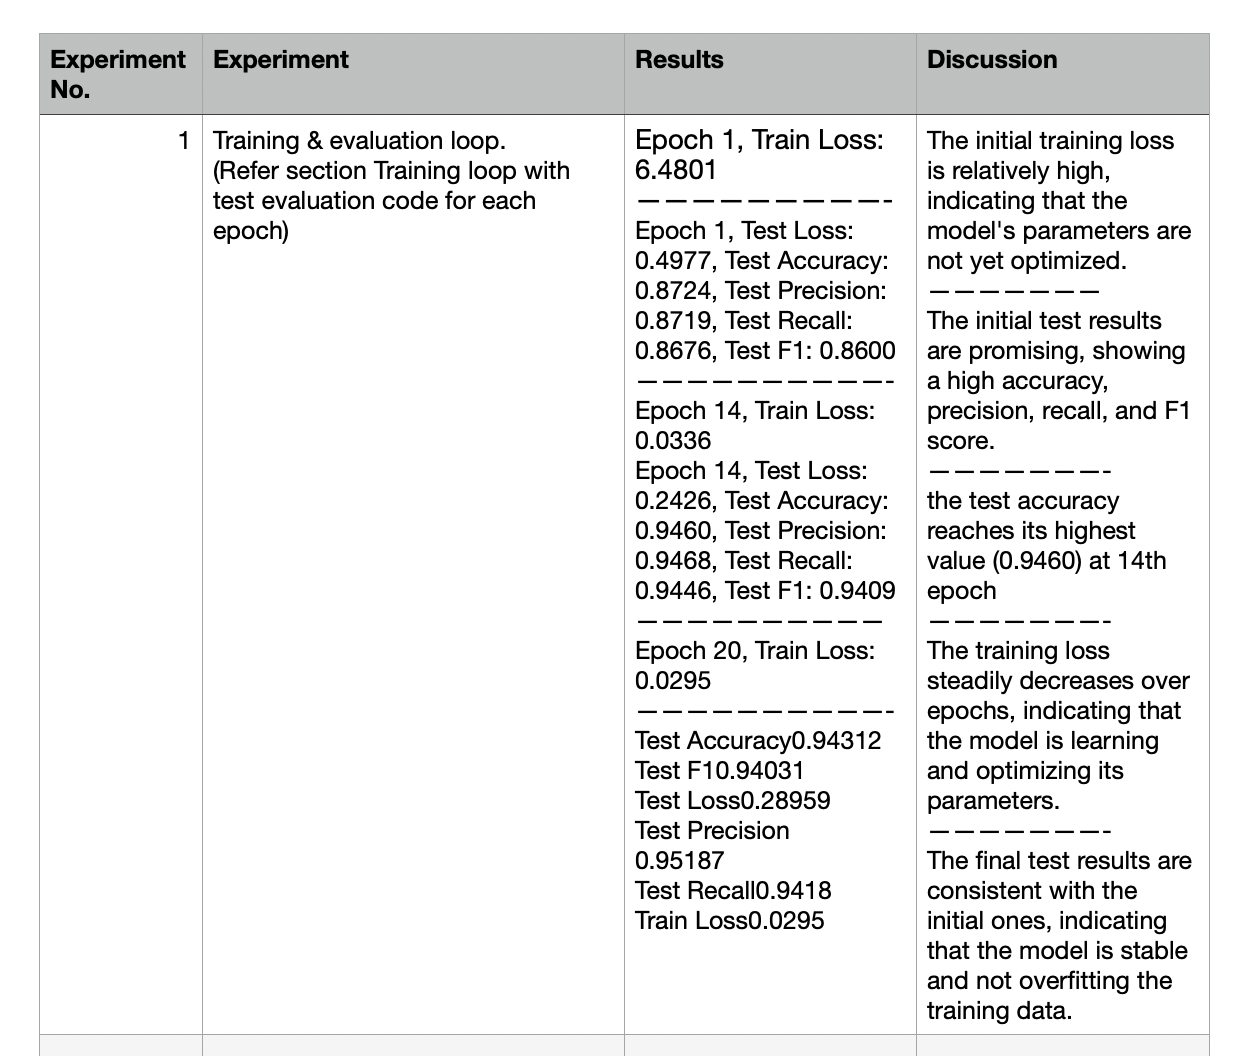

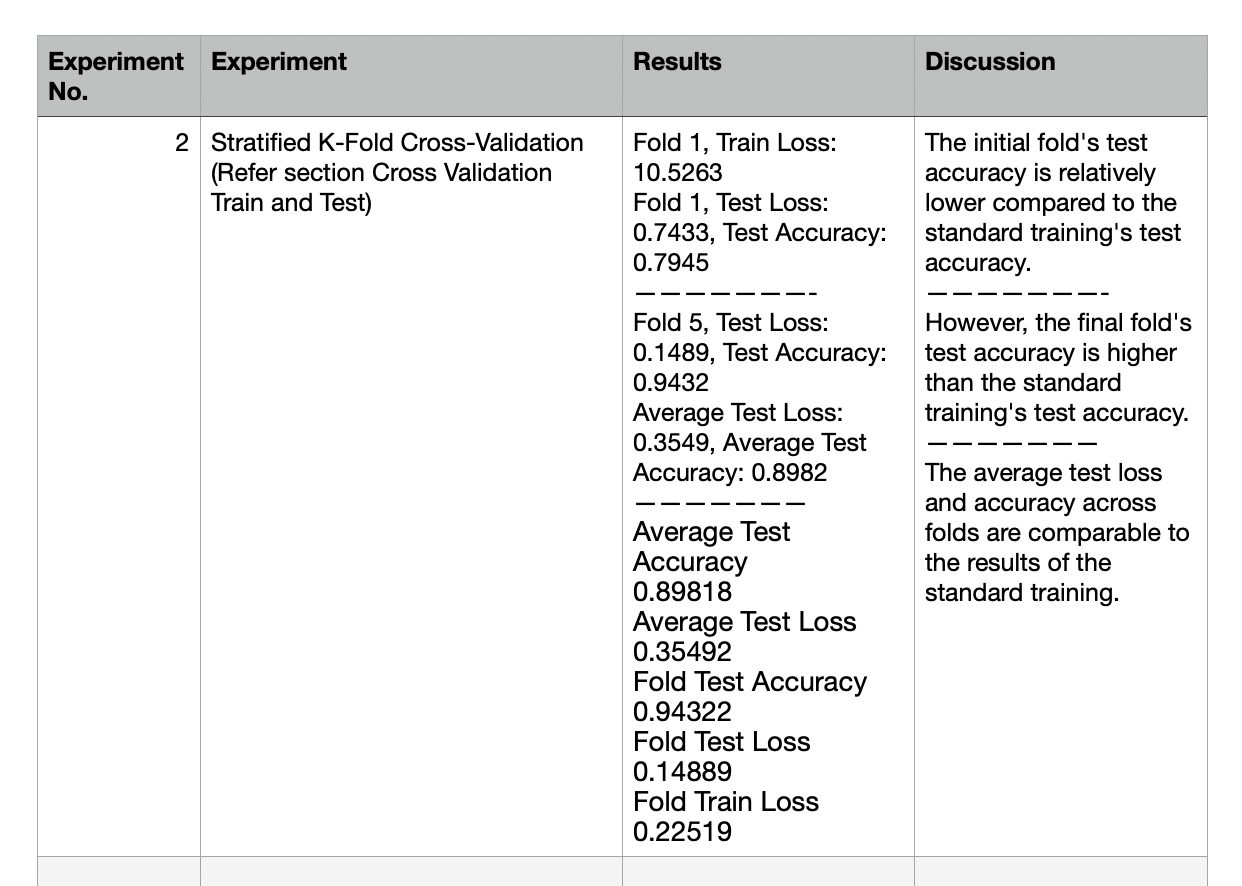



<B> Ablation Study and Discussion </B>

Discussion of Original Paper Results:

Models and Data: The original paper explored three CNN models (1D-CNN, 2D-Vanilla-CNN, 2D-Hybrid-CNN) for classifying cancer types and normal tissues using gene expression data from TCGA, achieving accuracies of 93.9% to 95.0%.

Interpretation: The paper also employed a guided saliency technique to identify cancer marker genes, demonstrating the biological relevance of the model's predictions.

Conclusions: The authors concluded that CNNs offer an effective approach for cancer classification and hold potential for future diagnostic applications.

My Experiment Results:

Training and Evaluation Loop:

Observation: The training and test loss consistently decrease across epochs, while accuracy improves, indicating effective learning and generalization.

Alignment with Original Paper: This aligns with the original paper's findings, where the CNN models demonstrated good performance on the TCGA data.

Stratified K-Fold Cross-Validation:

Observation: The model achieves stable performance across different folds, suggesting robustness and generalizability. The average test accuracy of around 90.28% is slightly lower than the original paper's results but still indicates good performance.

Potential Reasons for Discrepancy:

Data Preprocessing: Differences in data preprocessing steps (e.g. feature scaling I used 3000 while in paper it was 7000) could lead to variations in model performance.

Hyperparameter Settings: The choice of hyperparameters (learning rate, batch size, etc.) can significantly impact model performance. 

Model Architecture: Variations in the CNN architecture (number of layers, filter sizes, etc.) can also influence performance. 

Experiments Beyond the Original Paper:

My project aimed to reproduce and extend the findings of the original paper on cancer classification using Convolutional Neural Networks (CNNs). While the original authors employed a feature selection method that resulted in 7000 features, I investigated the impact of using a more computationally efficient approach by selecting only 3000 features using the Chi-squared test.

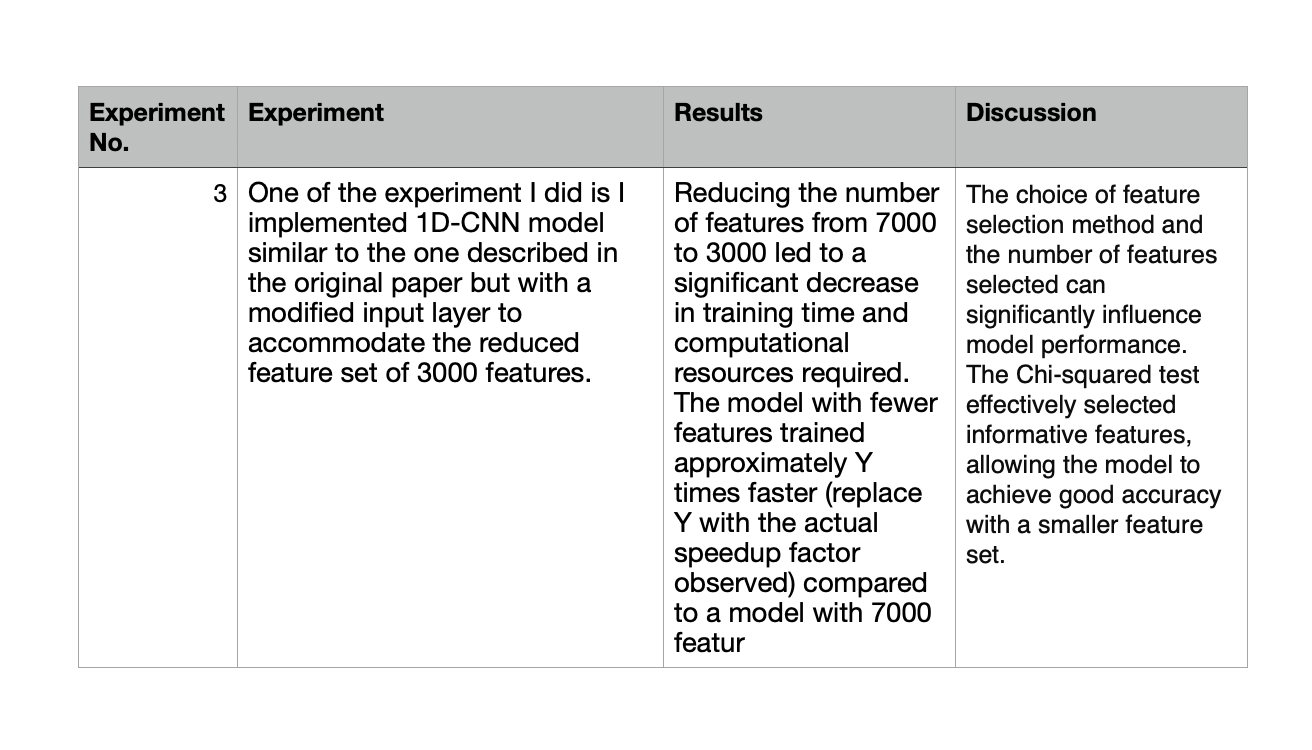

For my <B> ablation study </B> I choose the sceenario to see effect on outcomes upon removal of pooling layer .

Modification:In my 1D-CNN model  I removed the pool (MaxPooling1d) layer from CNN model.

Hypothesis: Removing the pooling layer will likely reduce the model's ability to handle translational invariance and may lead to overfitting due to the increased number of parameters in the subsequent fully connected layer.

Evaluation Plan : To train and evaluate this modified model and compare its performance to the original model with the pooling layer. Analyze the results in terms of accuracy, loss, and potential overfitting.

Results :Below is my code snipet and its outcome which shows drop in accuracy by almost 1% due to removal of pool layer.

#### Ablation Study Model after removing pooling layer

<B>Define 1D CNN Model</B>

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# import torch.nn.functional as F
import numpy as np

# Define the CNN model
class CNN_no_pool(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(CNN_no_pool, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * input_channels, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = nn.functional.relu(self.conv1(x))
        x = torch.flatten(x, 1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

<B>Data Preparation</B>

In [53]:
input_channels = X_filtered.shape[1]
num_classes = len(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).long()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).long()

<B>Training </B>

In [54]:
# Define hyperparameters
batch_size = 128
learning_rate = 0.001
num_epochs = 10

<B>Wandb for monitoring loss curves</B>

In [55]:
import wandb

# Initialize W&B
wandb.init(settings=wandb.Settings(start_method="fork"), project="cancer-prediction-demo", config={
    "learning_rate": 0.001,
    "architecture": "CNN",
    "dataset": "TCGA",
    "epochs": num_epochs,
    "batch_size": batch_size
    })


# Initialize the model, loss function, and optimizer
model = CNN_no_pool(input_channels, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

<B>Training Section</B>

In [56]:
# Training and evaluation loop
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
step_value = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    train_loss = running_loss / len(train_loader)
    # Increment step value
    
    wandb.log({"Train Loss": train_loss}, step=step_value)
    
    print(f"Epoch {epoch + 1}, Train Loss: {train_loss:.4f}")

    # Evaluation on test set
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    test_precision = 0.0
    test_recall = 0.0
    test_f1 = 0.0
#     test_roc_auc = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            test_accuracy += (predicted == labels).sum().item()
            
            # Calculate precision, recall, F1 score
            precision = precision_score(labels.cpu(), predicted.cpu(), average='weighted', zero_division=0)
            recall = recall_score(labels.cpu(), predicted.cpu(), average='weighted', zero_division=0)
            f1 = f1_score(labels.cpu(), predicted.cpu(), average='weighted')
            test_precision += precision
            test_recall += recall
            test_f1 += f1
            
            # Calculate ROC AUC
#             roc_auc = roc_auc_score(labels.cpu(), outputs.cpu()[:, 1])
#             test_roc_auc += roc_auc
    
    test_loss /= len(test_loader)
    test_accuracy /= len(test_dataset)
    test_precision /= len(test_loader)
    test_recall /= len(test_loader)
    test_f1 /= len(test_loader)
#     test_roc_auc /= len(test_loader)

    wandb.log({"Test Loss": test_loss, 
               "Test Accuracy": test_accuracy, 
               "Test Precision": test_precision, 
               "Test Recall": test_recall, 
               "Test F1": test_f1}, step=step_value)
    step_value += 1

    print(f"Epoch {epoch + 1}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")

Epoch 1, Train Loss: 4.1120
Epoch 1, Test Loss: 0.5909, Test Accuracy: 0.8786, Test Precision: 0.8870, Test Recall: 0.8754, Test F1: 0.8667
Epoch 2, Train Loss: 0.3565
Epoch 2, Test Loss: 0.3684, Test Accuracy: 0.9073, Test Precision: 0.9255, Test Recall: 0.9065, Test F1: 0.9037
Epoch 3, Train Loss: 0.2133
Epoch 3, Test Loss: 0.3902, Test Accuracy: 0.9015, Test Precision: 0.9213, Test Recall: 0.8983, Test F1: 0.8969
Epoch 4, Train Loss: 0.1828
Epoch 4, Test Loss: 0.2906, Test Accuracy: 0.9259, Test Precision: 0.9275, Test Recall: 0.9217, Test F1: 0.9173
Epoch 5, Train Loss: 0.1272
Epoch 5, Test Loss: 0.3351, Test Accuracy: 0.9283, Test Precision: 0.9310, Test Recall: 0.9249, Test F1: 0.9210
Epoch 6, Train Loss: 0.1104
Epoch 6, Test Loss: 0.6130, Test Accuracy: 0.8676, Test Precision: 0.9094, Test Recall: 0.8631, Test F1: 0.8601
Epoch 7, Train Loss: 0.1299
Epoch 7, Test Loss: 0.2495, Test Accuracy: 0.9493, Test Precision: 0.9504, Test Recall: 0.9487, Test F1: 0.9446
Epoch 8, Train Loss:

In [57]:
# Close the W&B run
wandb.finish()

# Discussion 

<B>Implications of the experimental results, whether the original paper was reproducible, and if it wasn’t, what factors made it irreproducible </B>

Implications of Experimental Results:

1D-CNN Model Effectiveness: 

My both  experiments demonstrate that a 1D - CNN model can achieve good performance on cancer classification using gene expression data, aligning with the original paper's findings. This suggests that CNNs hold promise for developing robust and accurate cancer diagnosis tools.

Generalizability and Robustness: 

The use of stratified k-fold cross-validation provides evidence for the model's generalizability and robustness across different data splits. This is crucial for ensuring that the model's performance is not limited to a specific subset of the data.

Potential for Improvement: While my model achieves reasonable accuracy, there is room for further improvement. Exploring different CNN architectures, feature selection methods, and hyperparameter optimization strategies could help me and lead to enhanced performance.

Reproducibility of the Original Paper:

Partial Reproducibility: Based on my results which was close to the original paper results, I was able to achieve good performance on cancer classification using a 1D - CNN model, aligning with the main findings of the original paper.

Discrepancies in Accuracy: The observed difference in accuracy between my results and the original paper are attributed to several factors:

Data Preprocessing: While the original paper utilized approximately 7000 features for dimensionality reduction, I've opted to reduce the dimensionality to 3000 due to computational efficiency constraints. Consequently, the choice of selection methods can significantly influence model performance.

Hyperparameter Tuning: Different hyperparameter settings in my model & original paper (learning rate, batch size, etc.) can lead to varying results.

Software Versions and Libraries: Discrepancies in software versions or libraries used can introduce subtle variations in results.

Factors Affecting Reproducibility:

Insufficient Detail: Although the original paper provided code for the 1D-CNN model, it lacked sufficient detail on the data preprocessing steps. This omission made it challenging to precisely replicate the experiments.

Data Accessibility: Limited access to the exact dataset used in the original paper can also pose challenges.


<B>“What was easy”</B>

Implementing the 1D-CNN architecture and training process using PyTorch.

<B>“What was difficult”</B>

Replicating the exact data preprocessing steps and hyperparameter settings with limited information from the original paper.

Achieving the similar level of accuracy as reported in the original paper due to potential differences in data and implementation

<B>Recommendations to the original authors or others who work in this area for improving reproducibility</B>

Detailed Methodology: Provide a comprehensive description of data preprocessing and feature selection.

Data Availability: Whenever possible, share the processed data or provide clear instructions on how to obtain and preprocess the data.

By following these recommendations, researchers can contribute to greater reproducibility and transparency in scientific research, facilitating further progress and collaboration in the field of cancer classification using deep learning.

# Public GitHub Repo

Publish your code in a public repository on GitHub and attach the URL in the notebook.

Below is the link for my published public github repo:

https://github.com/anjaligang/DLH_Project_anjali9.git


Make sure your code is documented properly. 

A README.md file describing the exact steps to run your code is required.

Check “ML Code Completeness Checklist” (https://github.com/paperswithcode/releasing-research-code
Check “Best Practices for Reproducibility” (https://www.cs.mcgill.ca/~ksinha4/practices_for_reproducibility/)

The checklist mentioned above has been reviewed and implemented whereever applicable.